# 육아 휴직 관련 법안에 대한 분석

In [1]:
import pandas as pd
import numpy as np
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import nltk
from konlpy import init_jvm 
from konlpy.tag import Okt
from konlpy.corpus import kobill
init_jvm()

In [3]:
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [4]:
doc_ko[:1000]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [5]:
okt = Okt()
tokens_ko = okt.nouns(doc_ko)
tokens_ko[:10]

['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의']

In [6]:
#수집된 단어의 횟수 및 고유한 횟수
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
len(ko.tokens), len(set(ko.tokens))

(735, 250)

In [7]:
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

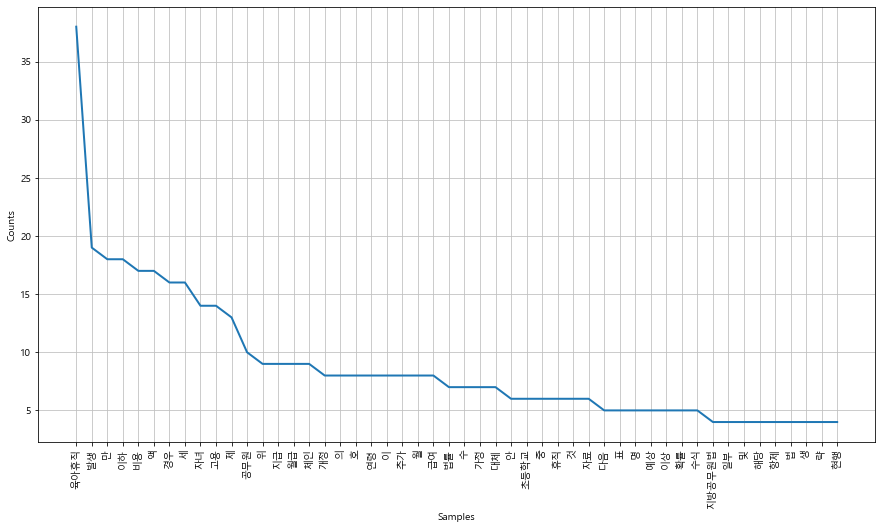

In [8]:
plt.figure(figsize=(15,8))
ko.plot(50)
plt.show()

In [9]:
# stopwords에 속하지 않은것만 필터링
# 영어는 stop_words를 적는것으로 끝났지만, 한글은 따로 기재해주어야한다.
# 많이 적을수록 더욱 정교해진다.
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']

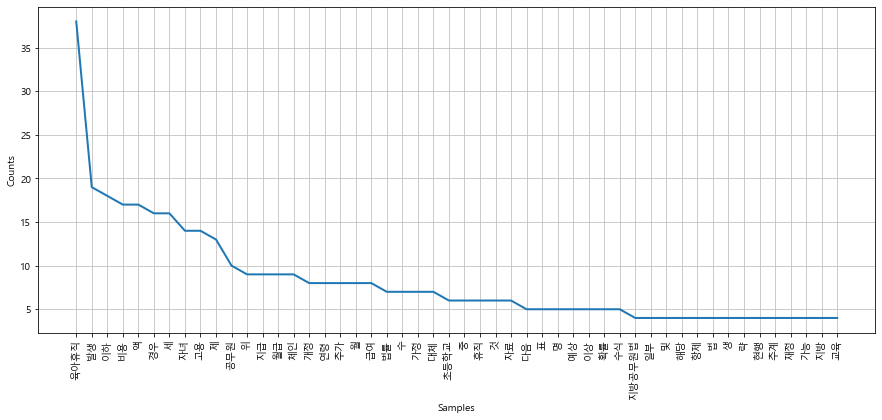

In [10]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [11]:
# 초등학교가 몇 번 언급되었다.
ko.count('초등학교')

6

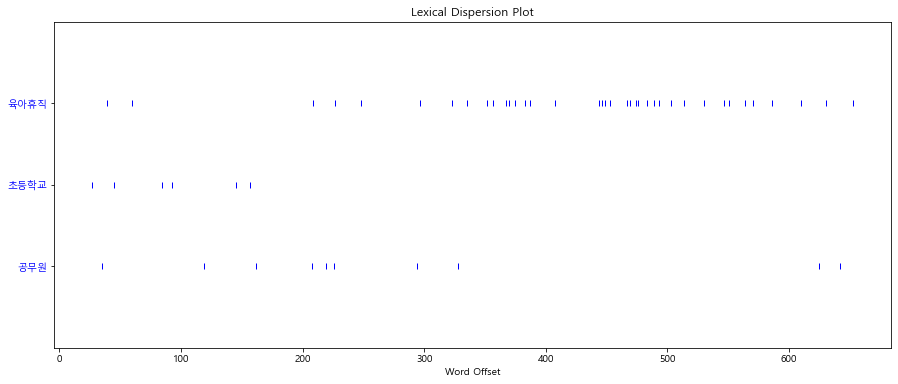

In [12]:
# 원하는 단어의 문서 내 대략적인 위치와 분량 확인
plt.figure(figsize=(15,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [13]:
# 원하는 단어의 주변 단어들까지 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [14]:
# 연어(붙여서 사용하는 단어)
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


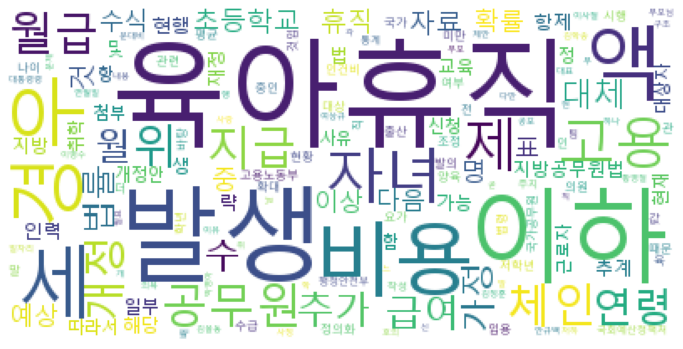

In [19]:
from wordcloud import WordCloud
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='/Library/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color = 'white',
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
